<a href="https://colab.research.google.com/github/Neel772/LSTM_Stock_Price_Prediction/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df=data
df.head()

/tmp/ipython-input-3830313737.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.237549,24.705318,23.798599,24.694233,212818400
1,2015-01-05,23.554743,24.086803,23.368523,24.006994,257142000
2,2015-01-06,23.556957,23.816336,23.195599,23.619031,263188400
3,2015-01-07,23.887276,23.987036,23.654499,23.765345,160423600
4,2015-01-08,24.805080,24.862721,24.097883,24.215381,237458000


In [5]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipython-input-3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.237549,24.705318,23.798599,24.694233,212818400
1,23.554743,24.086803,23.368523,24.006994,257142000
2,23.556957,23.816336,23.195599,23.619031,263188400
3,23.887276,23.987036,23.654499,23.765345,160423600
4,24.805080,24.862721,24.097883,24.215381,237458000


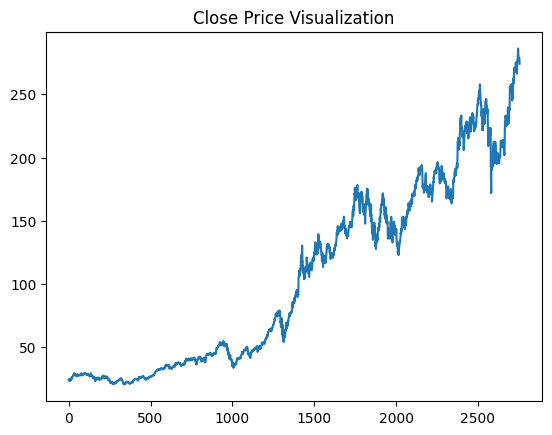

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.237549,24.705318,23.798599,24.694233,212818400
1,23.554743,24.086803,23.368523,24.006994,257142000
2,23.556957,23.816336,23.195599,23.619031,263188400
3,23.887276,23.987036,23.654499,23.765345,160423600
4,24.805080,24.862721,24.097883,24.215381,237458000
...,...,...,...,...,...
2750,277.179993,280.029999,276.920013,278.160004,32193300
2751,278.779999,279.750000,276.440002,277.750000,33038300
2752,278.029999,279.589996,273.809998,279.100006,33248000


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2750,247.686472
2751,248.353936
2752,248.994741
2753,249.640540


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

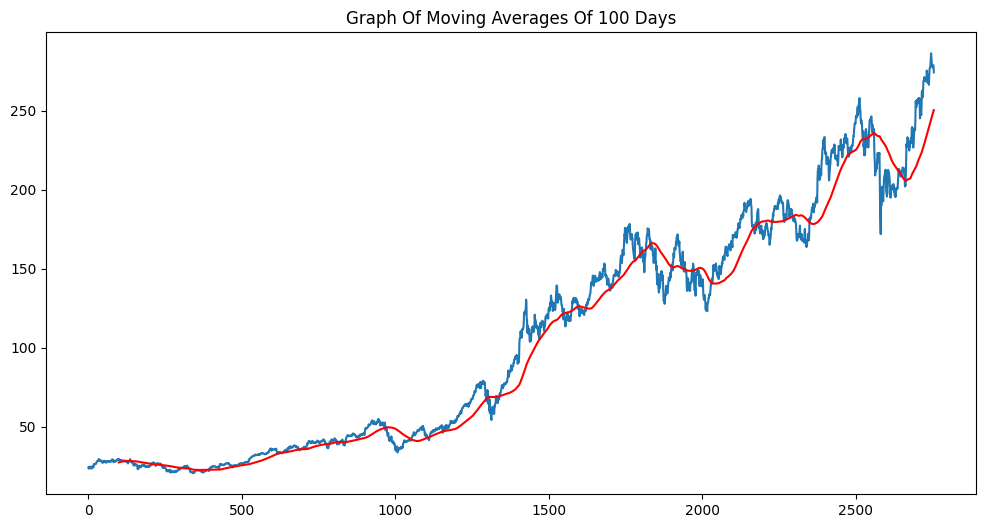

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2750,228.058781
2751,228.221690
2752,228.414136
2753,228.623079


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

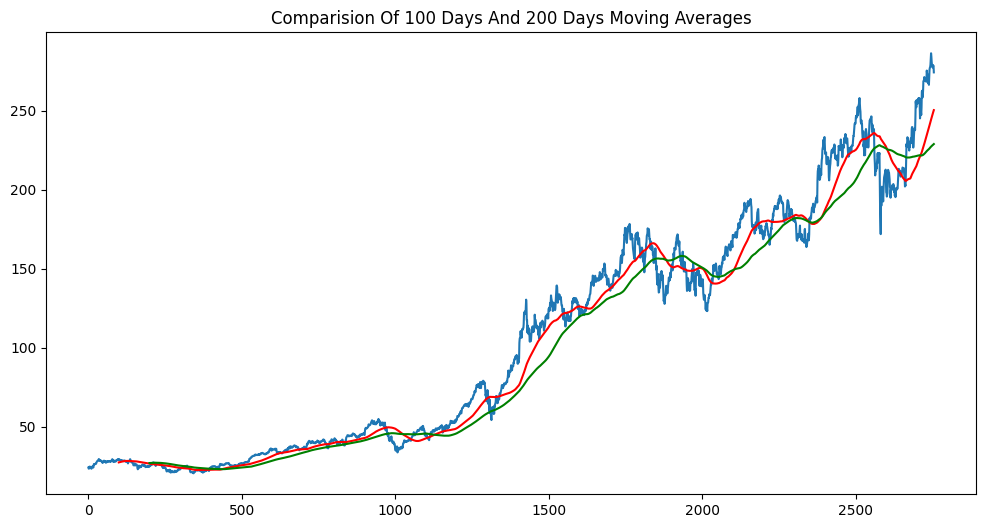

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(2755, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1928, 6)
(827, 6)


In [14]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.237549,24.705318,23.798599,24.694233,212818400
1,2015-01-05,23.554743,24.086803,23.368523,24.006994,257142000
2,2015-01-06,23.556957,23.816336,23.195599,23.619031,263188400
3,2015-01-07,23.887276,23.987036,23.654499,23.765345,160423600
4,2015-01-08,24.805080,24.862721,24.097883,24.215381,237458000


In [15]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1928,2022-08-30,156.289032,159.878825,155.118657,159.455924,77906200
1929,2022-08-31,154.626892,157.931475,154.548210,157.665924,87991100
1930,2022-09-01,155.354691,155.807095,152.118946,154.056455,74229900
1931,2022-09-02,153.240128,157.715085,152.413986,157.115145,76957800
1932,2022-09-06,151.981232,154.499005,151.155090,153.889236,73714800


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631937],
       [0.0219794 ],
       [0.01952938],
       ...,
       [0.9186529 ],
       [0.92977063],
       [0.87126362]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1828, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [27]:
# Prepare data for validation
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_100_days, test_df], ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

x_test shape: (827, 100, 1)
y_test shape: (827,)
Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - MAE: 0.1792 - loss: 0.0724 - val_MAE: 0.0715 - val_loss: 0.0077
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0590 - loss: 0.0082 - val_MAE: 0.0554 - val_loss: 0.0045
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0500 - loss: 0.0064 - val_MAE: 0.0552 - val_loss: 0.0047
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0491 - loss: 0.0060 - val_MAE: 0.0565 - val_loss: 0.0053
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - MAE: 0.0521 - loss: 0.0066 - val_MAE: 0.0683 - val_loss: 0.0072
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0458 - loss: 0.0053 - val_MAE: 0.0575 - val_loss: 0.0051
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0464 - loss: 0.0057 - val_MAE: 0.0576 - val_loss: 0.0051
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0471 - loss: 0.0060 - val_MAE: 0.0753 - val_loss: 0.0087
Epoch 9/50
58

In [28]:
model.save('keras_model.h5')

In [29]:

test_close.shape
test_close

array([[159.45592433],
       [157.66592355],
       [154.05645479],
       [157.11514512],
       [153.88923637],
       [152.26648325],
       [152.08943851],
       [152.90572755],
       [156.95779014],
       [157.26269007],
       [152.23695502],
       [152.09925057],
       [148.71604501],
       [146.84732672],
       [150.86989155],
       [154.7448891 ],
       [149.86673172],
       [148.6963423 ],
       [147.19160175],
       [150.22077458],
       [145.20488029],
       [143.6902774 ],
       [138.94981064],
       [135.93040693],
       [142.63796359],
       [141.69379453],
       [143.40510942],
       [140.18900682],
       [138.10398865],
       [137.59255306],
       [136.83528248],
       [132.76354025],
       [141.92981171],
       [138.7432773 ],
       [143.09036554],
       [139.35302135],
       [140.6611013 ],
       [140.51358071],
       [144.76231203],
       [147.61447265],
       [148.47014957],
       [145.62779799],
       [145.75564836],
       [150

In [30]:
past_100_days = pd.DataFrame(train_close[-100:])

In [31]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [33]:
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [34]:
final_df.head()

,0
0,169.033687
1,167.856834
2,168.464867
3,165.454106
4,164.777430


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.27703122],
       [0.26976951],
       [0.27352135],
       [0.2549436 ],
       [0.25076821],
       [0.24695586],
       [0.26650166],
       [0.22595769],
       [0.23261403],
       [0.25524627],
       [0.25615399],
       [0.24132798],
       [0.20901386],
       [0.21585177],
       [0.17748623],
       [0.19769766],
       [0.21337078],
       [0.18232743],
       [0.19104136],
       [0.20023915],
       [0.22553409],
       [0.17947848],
       [0.17293338],
       [0.17650884],
       [0.16426726],
       [0.0992407 ],
       [0.11027023],
       [0.11608817],
       [0.13614754],
       [0.12396643],
       [0.08172652],
       [0.07693904],
       [0.06906043],
       [0.08736249],
       [0.07293916],
       [0.06663637],
       [0.11511863],
       [0.13742059],
       [0.14245023],
       [0.12990534],
       [0.12426944],
       [0.12505725],
       [0.10881587],
       [0.13445057],
       [0.12536027],
       [0.08415064],
       [0.03924408],
       [0.040

In [36]:
input_data.shape

(927, 1)

# Testing the model

---



In [37]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(827, 100, 1)
(827,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [39]:
# Making predictions

y_pred = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


In [40]:
y_pred.shape

(827, 1)

In [41]:
y_test

array([0.21793213, 0.20688702, 0.18461498, 0.20348847, 0.18358317,
       0.17357005, 0.17247761, 0.17751448, 0.20251752, 0.20439889,
       0.17338785, 0.17253815, 0.15166226, 0.14013143, 0.16495245,
       0.18886293, 0.15876251, 0.15154068, 0.14225576, 0.16094711,
       0.12999679, 0.12065101, 0.09140021, 0.07276913, 0.11415777,
       0.10833182, 0.1188914 , 0.0990466 , 0.08618111, 0.08302532,
       0.07835262, 0.05322815, 0.10978815, 0.09012581, 0.11694929,
       0.0938882 , 0.10195964, 0.10104937, 0.12726595, 0.14486506,
       0.15014497, 0.13260639, 0.13339528, 0.16349612, 0.17514771,
       0.13794701, 0.09613368, 0.09774613, 0.06747392, 0.08753406,
       0.0759233 , 0.09257928, 0.12041997, 0.13956787, 0.1593239 ,
       0.14054056, 0.12412796, 0.15987083, 0.14680169, 0.13446199,
       0.14248578, 0.13555592, 0.11628642, 0.1111192 , 0.0935517 ,
       0.13494808, 0.121271  , 0.13227339, 0.12801836, 0.09835408,
       0.09938732, 0.09926579, 0.10145427, 0.1427896 , 0.11756

In [42]:
y_pred

array([[0.24237603],
       [0.24755651],
       [0.2521052 ],
       [0.25575987],
       [0.25819802],
       [0.25920662],
       [0.25858918],
       [0.25630954],
       [0.2525978 ],
       [0.24780796],
       [0.24243653],
       [0.23665556],
       [0.23049828],
       [0.2242117 ],
       [0.21789342],
       [0.21162477],
       [0.2055813 ],
       [0.19990152],
       [0.19476256],
       [0.19025865],
       [0.18641572],
       [0.18316077],
       [0.18040256],
       [0.17802195],
       [0.17587496],
       [0.17385489],
       [0.17188483],
       [0.16989021],
       [0.16782597],
       [0.1656748 ],
       [0.16342747],
       [0.16105115],
       [0.15852311],
       [0.15591773],
       [0.15330403],
       [0.15080479],
       [0.14849645],
       [0.14643937],
       [0.14466885],
       [0.14325127],
       [0.14227247],
       [0.14175624],
       [0.14166814],
       [0.14197744],
       [0.14266855],
       [0.14369768],
       [0.14502712],
       [0.146

In [43]:
scaler.scale_

array([0.00617045])

In [44]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

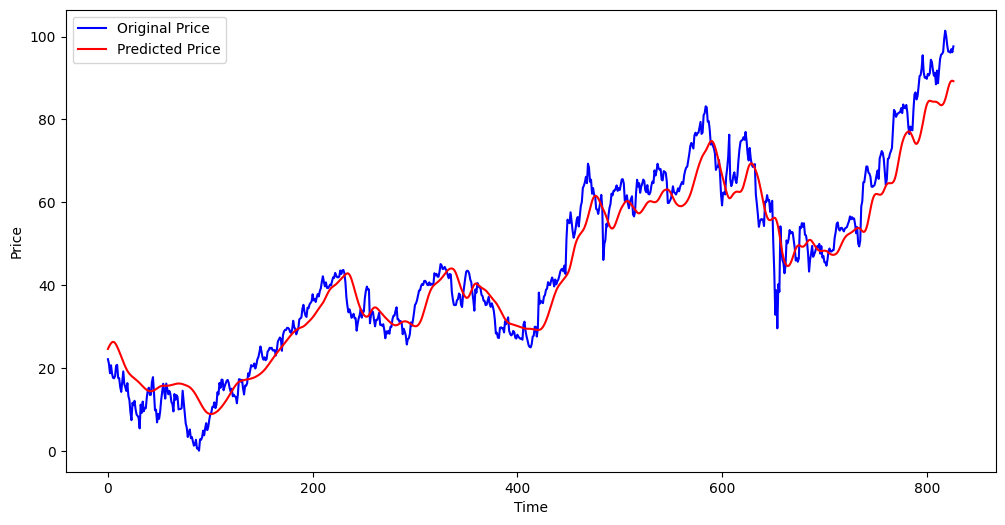

In [45]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.735334528097252
